<font color='blue'> **29. SUB - One-Dimensional Compaction in a Three-Dimensional Flow Field.** </font>  

In [20]:
import os ; from pathlib import Path  ; import flopy ; import matplotlib.pyplot as plt ; import numpy as np ; from flopy.plot.styles import styles   
from modflow_devtools.misc import get_env ; write = get_env("WRITE", True) ; run = get_env("RUN", True) ; import pandas as pd 
sim_name = "ex-gwf-csub-p04" ; workspace = Path("./29_SUB")   ; workspace.mkdir(exist_ok=True)    ; exe_name = 'E:\\15_REPOS\\00_BETAMI\\bin\\mf6.exe'  
path  = 'E:\\15_REPOS\\00_BETAMI\\bin\\data_modflow6-examples\\ex-gwf-csub-p04'  ; fpath1 = os.path.join(path,"idomain.txt") 

In [21]:
length_units = "meters" ;time_units = "days" ;nlay = 4 ;nrow = 20 ;ncol = 15 ;delr = 2000 ;delc = 2000 ;top = 150 ;botm_str = "50.,-100.,-150.,-350." ;
strt = 100 ;icelltype_str = "1,0,0,0" ;k11_str = "4.,4.,0.01,4." ;k33_str = "0.4,0.4,0.01,0.4" ;sy_str = "0.3,0.3,0.4,0.3" ;

gammaw = 9806.65 ; beta = 0.00000000046612 ;sgm_str = "1.77,1.77,1.60,1.77" ;sgs_str = "2.06,2.05,1.94,2.06" ;cg_theta_str = "0.32,0.32,0.45,0.32" ;
cg_ske_str = "0.005,0.005,0.01,0.005" ;ib_thick_str = "45.,70.,50.,90." ;ib_theta = 0.45 ;ib_cr = 0.01 ;ib_cv = 0.25 ;stress_offset = 15 ;

nouter = 100 ;ninner = 300 ;hclose = 0.000000001 ;rclose = 0.000001 ;linaccel = "bicgstab" ;relax = 0.97 ;nper = 3 ;
tdis_ds = ((0.0, 1, 1.0),(21915.0, 60, 1.0),(21915.0, 60, 1.0),)

botm   = [float(value) for value in botm_str   .split(",")]   ; icelltype = [int(value)   for value in icelltype_str.split(",")]
k11    = [float(value) for value in k11_str    .split(",")]   ; k33       = [float(value) for value in k33_str      .split(",")]
sy     = [float(value) for value in sy_str     .split(",")]   ; sgm       = [float(value) for value in sgm_str      .split(",")]
sgs    = [float(value) for value in sgs_str    .split(",")]   ; cg_theta  = [float(value) for value in cg_theta_str .split(",")]
cg_ske = [float(value) for value in cg_ske_str .split(",")]   ; ib_thick  = [float(value) for value in ib_thick_str .split(",")]

ibb = np.loadtxt(fpath1, dtype=int) ; idomain = np.tile(ibb, (nlay, 1))        ; chd_locs = [(nrow - 1, 7), (nrow - 1, 8)] ; c6 = []
for i, j in chd_locs:
    for k in range(nlay): c6.append([k, i, j, strt])
    
rch_rate = 5.5e-4        ; rch6 = []
for i in range(nrow):
    for j in range(ncol):
        if ibb[i, j] != 2 or (i, j) in chd_locs:
            continue
        rch6.append([0, i, j, rch_rate])

well_locs = ((1, 8, 9),(3, 11, 6),)  ; well_rates = (-72000,0.0,)     ; wel6 = {}
for idx, q in enumerate(well_rates):   
    spd = []
    for k, i, j in well_locs:  spd.append([k, i, j, q]) ; wel6[idx + 1] = spd

icsubno = 0 ; csub_pakdata = [] ; boundname_dict = {}
for i in range(nrow):
    for j in range(ncol):
        if ibb[i, j] < 1 or (i, j) in chd_locs:
            continue
        for k in range(nlay):
            boundname = f"{k + 1:02d}_{i + 1:02d}_{j + 1:02d}"  ; boundname_dict[boundname] = (icsubno,)
            ib_lst = [icsubno,(k, i, j),"nodelay", stress_offset,ib_thick[k],1.0,ib_cv,ib_cr,ib_theta,999.0,999.0,boundname,]
            csub_pakdata.append(ib_lst)  ; icsubno += 1

In [22]:
s1 = pd.DataFrame(ibb) ; s1.to_csv(workspace/'01a_idomain.csv')                ; s2 = pd.DataFrame(idomain) ; s2.to_csv (workspace / '01b_idomain3D.csv')
print('chd_locs / c6',chd_locs)  ; print('rch6', rch6)                         ; print('well_locs',well_locs, 'wel6', wel6, 'spd',spd)     
s3 = pd.DataFrame(csub_pakdata)  ; s3.to_csv(workspace/'02_csub_pakdata.csv')  ; print('len(csub_pakdata / interbeds)',len(csub_pakdata))

chd_locs / c6 [(19, 7), (19, 8)]
rch6 [[0, 0, 7, 0.00055], [0, 1, 4, 0.00055], [0, 1, 7, 0.00055], [0, 1, 11, 0.00055], [0, 2, 3, 0.00055], [0, 3, 11, 0.00055], [0, 4, 2, 0.00055], [0, 4, 12, 0.00055], [0, 5, 13, 0.00055], [0, 6, 1, 0.00055], [0, 13, 1, 0.00055], [0, 13, 13, 0.00055], [0, 15, 2, 0.00055], [0, 15, 12, 0.00055], [0, 16, 12, 0.00055], [0, 17, 3, 0.00055], [0, 17, 11, 0.00055], [0, 18, 6, 0.00055]]
well_locs ((1, 8, 9), (3, 11, 6)) wel6 {1: [[1, 8, 9, -72000], [3, 11, 6, -72000]], 2: [[1, 8, 9, 0.0], [3, 11, 6, 0.0]]} spd [[1, 8, 9, 0.0], [3, 11, 6, 0.0]]
len(csub_pakdata / interbeds) 840


In [23]:
ab = s3  ;ab=ab.rename(columns = lambda x : 'a' + str(x)) ;ab.head(8) ;ab2=ab['a1']  ;ab3=ab2.tolist() ;ab4=pd.DataFrame(ab3)
ab5=ab4.rename(columns=lambda x : 'b'+str(x)) ; ab6 = pd.concat([ab[:], ab5[:]], axis=1); ab6.tail(2) 
ID = ['icsubno','(k, i, j)','nodelay', 'stress_offset','ib_thick[k]','1.0','ib_cv','ib_cr','ib_theta','999.0','999.0','boundname','b0','b1','b2']
ab6.columns = ID  ; ab6.to_csv (workspace / "02b.csv") ; ab6.head(2) 

,icsubno,"(k, i, j)",nodelay,stress_offset,ib_thick[k],1.0,ib_cv,ib_cr,ib_theta,999.0,999.0,boundname,b0,b1,b2
0,0,"(0, 0, 5)",nodelay,15,45.0,1.0,0.25,0.01,0.45,999.0,999.0,01_01_06,0,0,5
1,1,"(1, 0, 5)",nodelay,15,70.0,1.0,0.25,0.01,0.45,999.0,999.0,02_01_06,1,0,5


In [24]:
csub_OBS = [("w1l1","interbed-compaction",boundname_dict["01_09_10"]),("w1l2","interbed-compaction",boundname_dict["02_09_10"]),("w1l3","interbed-compaction",boundname_dict["03_09_10"]),("w1l4","interbed-compaction",boundname_dict["04_09_10"]),("w2l1","interbed-compaction",boundname_dict["01_12_07"]),("w2l2","interbed-compaction",boundname_dict["02_12_07"]),("w2l3","interbed-compaction",boundname_dict["03_12_07"]),("w2l4","interbed-compaction",boundname_dict["04_12_07"]),("s1l1","coarse-compaction",(0,8,9)),("s1l2","coarse-compaction",(1,8,9)),("s1l3","coarse-compaction",(2,8,9)),("s1l4","coarse-compaction",(3,8,9)),("s2l1","coarse-compaction",(0,11,6)),("s2l2","coarse-compaction",(1,11,6)),("s2l3","coarse-compaction",(2,11,6)),("s2l4","coarse-compaction",(3,11,6)),("c1l1","compaction-cell",(0,8,9)),("c1l2","compaction-cell",(1,8,9)),("c1l3","compaction-cell",(2,8,9)),("c1l4","compaction-cell",(3,8,9)),("c2l1","compaction-cell",(0,11,6)),("c2l2","compaction-cell",(1,11,6)),("c2l3","compaction-cell",(2,11,6)),("c2l4","compaction-cell",(3,11,6)),("w2l4q","csub-cell",(3,11,6)),("gs1","gstress-cell",(0,8,9)),("es1","estress-cell",(0,8,9)),("pc1","preconstress-cell",(0,8,9)),("gs2","gstress-cell",(1,8,9)),("es2","estress-cell",(1,8,9)),("pc2","preconstress-cell",(1,8,9)),("gs3","gstress-cell",(2,8,9)),("es3","estress-cell",(2,8,9)),("pc3","preconstress-cell",(2,8,9)),("gs4","gstress-cell",(3,8,9)),("es4","estress-cell",(3,8,9)),("pc4","preconstress-cell",(3,8,9)),("sk1l2","ske-cell",(1,8,9)),("sk2l4","ske-cell",(3,11,6)),("t1l2","theta",(1,8,9)),("w1qie","elastic-csub",boundname_dict["02_09_10"]),("w1qii","inelastic-csub",boundname_dict["02_09_10"]),("w1qaq","coarse-csub",(1,8,9)),("w1qt","csub-cell",(1,8,9)),("w1wc","wcomp-csub-cell",(1,8,9)),("w2qie","elastic-csub",boundname_dict["04_12_07"]),("w2qii","inelastic-csub",boundname_dict["04_12_07"]),("w2qaq","coarse-csub",(3,11,6)),("w2qt","csub-cell",(3,11,6)),("w2wc","wcomp-csub-cell",(3,11,6)),]
Utl_OBS  = {"gwf_obs.csv":[("h1l1" ,"HEAD" ,(0 , 8 ,9)) ,("h1l2" ,"HEAD" ,(1 , 8 ,9)) ,("h1l3" ,"HEAD" ,(2 , 8 ,9)) ,("h1l4" ,"HEAD" ,(3 , 8 ,9)),("h2l1" ,"HEAD" ,(0 ,11 ,6)) ,("h2l2" ,"HEAD" ,(1 ,11 ,6)) ,("h3l2" ,"HEAD" ,(2 ,11 ,6)) ,("h4l2" ,"HEAD" ,(3 ,11 ,6)) ,]}
s4 = pd.DataFrame(csub_OBS) ; s4.to_csv (workspace / '03_csub_OBS.csv')   ; s5 = pd.DataFrame(Utl_OBS)  ; s5.to_csv (workspace / '04_Utl_OBS.csv') 

In [25]:
ab = s4  ;ab=ab.rename(columns = lambda x : 'a' + str(x)) ;ab.head(8) ;ab2=ab['a2']  ;ab3=ab2.tolist() ;ab4=pd.DataFrame(ab3)
ab5=ab4.rename(columns=lambda x : 'b'+str(x)) ; ab6 = pd.concat([ab[:], ab5[:]], axis=1); ab6.tail(2) ; ab6.to_csv (workspace / "03b.csv") ; ab6.tail(2) 

,a0,a1,a2,b0,b1,b2
48,w2qt,csub-cell,"(3, 11, 6)",3,11.0,6.0
49,w2wc,wcomp-csub-cell,"(3, 11, 6)",3,11.0,6.0


In [26]:
ab = s5  ; ab2 = ab['gwf_obs.csv'].tolist() ; ab3=pd.DataFrame(ab2) ; ab4 = ab3.iloc[:,-1].copy() ; ab5=ab4.tolist(); ab6=pd.DataFrame(ab5); ab6
ab6i=ab6.rename(columns=lambda x : 'b'+str(x)) ; ab3i=ab3.rename(columns=lambda x : 'a'+str(x)) 
ab7 = pd.concat([ab3i[:], ab6i[:]], axis=1); ab7.tail(2) ; ab7.to_csv (workspace / "04b.csv") ; ab7.tail(2) 

,a0,a1,a2,b0,b1,b2
6,h3l2,HEAD,"(2, 11, 6)",2,11,6
7,h4l2,HEAD,"(3, 11, 6)",3,11,6


In [27]:
def build_models():
    opth=f"{sim_name}.csub.obs"          ; csub_csv=opth + ".csv"    ;orecarray={csub_csv: csub_OBS}   ##  02
    head_filerecord=f"{sim_name}.hds"    ; budget_filerecord=f"{sim_name}.cbc"

    sim = flopy.mf6.MFSimulation         (sim_name=sim_name ,sim_ws=workspace ,exe_name="mf6")
    flopy.mf6.ModflowTdis (sim ,nper=nper ,perioddata=tdis_ds ,time_units=time_units)
    flopy.mf6.ModflowIms  (sim ,outer_maximum=nouter ,outer_dvclose=hclose ,linear_acceleration=linaccel ,inner_maximum=ninner ,
                          inner_dvclose=hclose ,relaxation_factor=relax ,rcloserecord=f"{rclose}strict" ,)
    gwf = flopy.mf6.ModflowGwf           (sim ,modelname=sim_name ,save_flows=True ,newtonoptions="newton")
    flopy.mf6.ModflowGwfdis (gwf ,length_units=length_units ,nlay=nlay ,nrow=nrow ,ncol=ncol ,delr=delr ,delc=delc ,top=top ,botm=botm ,idomain=idomain ,)
    flopy.mf6.ModflowUtlobs (gwf ,digits=10 ,print_input=True         ,continuous = Utl_OBS)            ## 03
    flopy.mf6.ModflowGwfic  (gwf ,strt=strt)
    flopy.mf6.ModflowGwfnpf (gwf ,icelltype=icelltype ,k=k11 ,save_specific_discharge=True)
    flopy.mf6.ModflowGwfsto (gwf ,iconvert=icelltype ,ss=0.0 ,sy=sy ,steady_state={0:True} ,transient={1:True})
    csub = flopy.mf6.ModflowGwfcsub      (gwf ,print_input=True ,save_flows=True ,compression_indices=True ,update_material_properties=True,
                                          boundnames=True ,ninterbeds=len(csub_pakdata) ,sgm=sgm ,sgs=sgs ,cg_theta=cg_theta ,cg_ske_cr=cg_ske,
                                          beta=beta ,gammaw=gammaw ,packagedata=csub_pakdata)           ## 01
    csub.obs.initialize  (filename=opth, digits=10, print_input=True  ,continuous = orecarray )         ## 03
    flopy.mf6.ModflowGwfchd (gwf, stress_period_data={0: c6})
    flopy.mf6.ModflowGwfrch (gwf, stress_period_data={0: rch6})
    flopy.mf6.ModflowGwfwel (gwf, stress_period_data=wel6)
    flopy.mf6.ModflowGwfoc  (gwf,head_filerecord=head_filerecord,budget_filerecord=budget_filerecord,printrecord=[("BUDGET", "ALL")],
                             saverecord=[("BUDGET", "ALL"), ("HEAD", "ALL")], )
    return sim
def write_models(sim, silent=True):  sim.write_simulation(silent=silent)
def run_models  (sim, silent=True):  sim.run_simulation(silent=silent)
def scenario(silent=True): 
    sim = build_models()
    if write:  write_models(sim, silent=silent)
    if run:    run_models(sim, silent=silent)
scenario()

<font color='blue'> **RES** </font>  

In [28]:
sim = build_models()     ; gwf = sim.get_model(sim_name)         ; csub_obs = gwf.csub.output.obs().data ; csub_obs["totim"] /= 365.25 ; name = sim.name
dx = gwf.dis.delr.array  ; hh0=gwf.output.head().get_data(kstpkper=(0,0))                               ; hh1=gwf.output.head().get_data(kstpkper=(59,1))
#hsxs0 = hh0[0,8,:] ;hsxs1 = hh1[0,8,:] #hxloc=np.arange(1000,2000.0*15, 2000.0) ; w1loc = (9.5 * 2000.0, 11.75 * 2000.0) ; w2loc=(6.5*2000.0,8.5*2000.0)

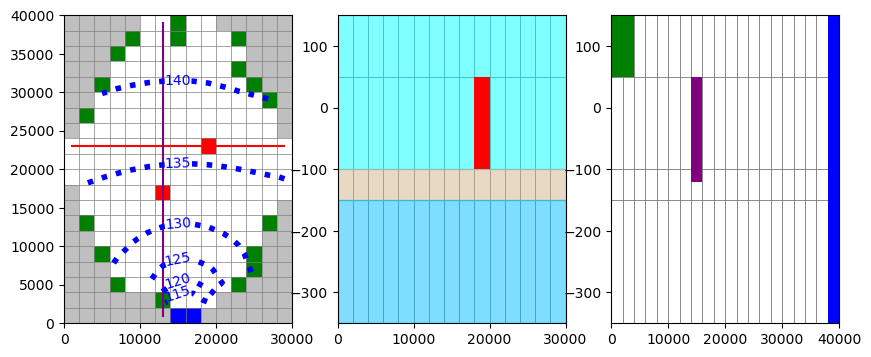

In [29]:
fig = plt.figure(figsize=(10, 4))        
ax = fig.add_subplot(131)   ; extents = gwf.modelgrid.extent     ; dy = gwf.dis.delc.array
mm = flopy.plot.PlotMapView(model=gwf, ax=ax, extent=extents)    ; mm.plot_grid(lw=0.5, color="0.5") ; mm.plot_bc(ftype="WEL", kper=1, plotAll=True) 
mm.plot_bc(ftype="CHD", color="blue")                            ; mm.plot_bc(ftype="RCH", color="green") ; mm.plot_inactive(color_noflow="0.75")  
mm.ax.plot((1000 ,29000), (23000,23000), color="red")            ; mm.ax.plot((13000,13000), (1000 ,39000), color="purple")
cll = mm.contour_array( hh0 ,masked_values=[1.0e30],levels=np.arange(115, 200, 5),colors="blue",linestyles="dotted",linewidths=4)
ax.clabel(cll, fmt="%3i", inline_spacing=0.1)               # ss =np.max(hh0) - np.min(hh0); levels=np.arange(np.min(hh0[0]), np.max(hh0[0]), ss/10) 
ax = fig.add_subplot(132) 
mm = flopy.plot.PlotCrossSection(model=gwf, ax=ax, line={"row": 8})    ; mm.plot_grid(lw=0.5, color="0.5")
ax.fill_between([0,dx.sum()],y1=150,y2=-100, color="cyan"    , alpha=0.5) ;ax.fill_between([0, dx.sum()]  , y1=-100, y2=-150   , color="#D2B48C", alpha=0.5)
ax.fill_between([0,dx.sum()],y1=-150,y2=-350,color="#00BFFF",alpha=0.5) ;ax.fill_between([dx.cumsum()[8], dx.cumsum()[9]], y1=50,y2=-100,color="red",lw=0)
ax = fig.add_subplot(133) 
mm = flopy.plot.PlotCrossSection(model=gwf, ax=ax, line={"column": 7}) ; mm.plot_grid(lw=0.5, color="0.5") 
ax.fill_between([dy.cumsum()[6], dy.cumsum()[7]], y1=50,y2=-120,color="purple",lw=0)
mm.plot_bc(ftype="CHD", color="blue") ; mm.plot_bc(ftype="RCH", color="green") ; plt.show()

In [30]:
csub_obs_P1 = pd.DataFrame(csub_obs)   ; csub_obs_P1.set_index("totim", inplace=True) ; csub_obs_P1.to_csv (workspace / 'b01_MOD_CSUB.csv') 
s1=[name for name in csub_obs.dtype.names if "PC" in name] ; s2=[name for name in csub_obs.dtype.names if "ES" in name]  
s3=[name for name in csub_obs.dtype.names if "GS" in name] 

PC1 ES1 GS1
PC2 ES2 GS2


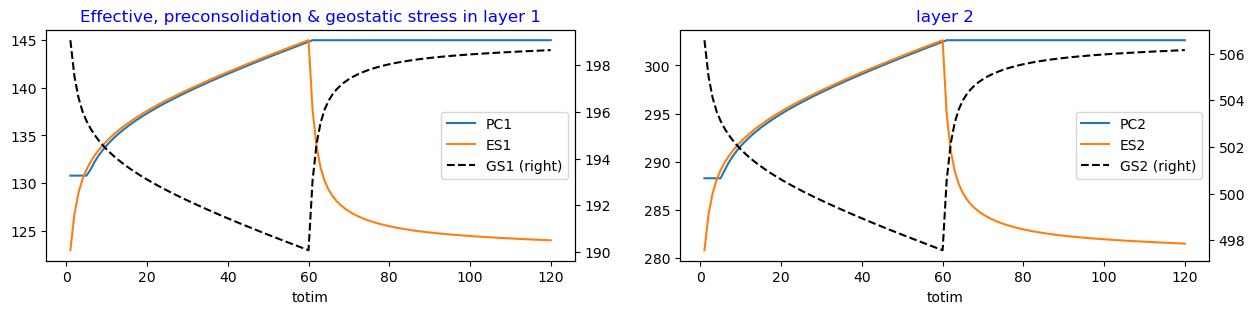

In [31]:
print(s1[0], s2[0], s3[0]) ; print(s1[1], s2[1], s3[1])
df = csub_obs_P1[['PC1','ES1','GS1'  ,'PC2','ES2','GS2']].copy()  ; df.drop(index=0, inplace=True)
fig,ax = plt.subplots(1,2) 
ax[0] = df[['PC1','ES1']].plot(figsize=(15,3), ax=ax[0])          ; _=df[['GS1']].plot( ax=ax[0], secondary_y=True, linestyle='dashed', color = 'black') 
ax[1] = df[['PC2','ES2']].plot(figsize=(15,3), ax=ax[1])          ; _=df[['GS2']].plot( ax=ax[1], secondary_y=True, linestyle='dashed', color = 'black') 
ax[0].set_title('Effective, preconsolidation & geostatic stress in layer 1' ,color='blue' )     ; ax[1].set_title('layer 2' ,color='blue' ) ; plt.show()

In [33]:
def SUB(sim):
    name = sim.name ;     gwf = sim.get_model(sim_name)  ;     csub_obs = gwf.csub.output.obs().data ;     csub_obs["totim"] /= 365.25
    slist = [name for name in csub_obs.dtype.names if "PC" in name]
    for tag in slist: csub_obs[tag][0] = csub_obs[tag][1]
    sk_tags = ("SK1L2","SK2L4",)
    for tag in sk_tags:
        if tag in csub_obs.dtype.names: 
            csub_obs[tag][0] = csub_obs[tag][1]
    return csub_obs

def calc_compaction_at_surface(sim): 
    csub_obs = SUB(sim)
    for tag in plot_tags:  
        for k in (3, 2, 1):
            tag0 = f"{tag}{k}";tag1=f"{tag}{k+1}"     ; csub_obs[tag0] += csub_obs[tag1]
    return csub_obs

def pplt(ax, sim, tg="W1L"):
    colors = ["#FFF8DC", "#D2B48C", "#CD853F", "#8B4513"][::-1]   ;  obs = calc_compaction_at_surface(sim)
    for k in range(nlay):    # nlay = 4
        fc = colors[k]       ;tag=f"{tg}{k + 1}"  ;label=f"Layer {k + 1}"       ; ax.fill_between(obs["totim"], obs[tag], y2=0, color=fc, label=label)
    return 

In [34]:
e2=csub_obs_P1.drop(0).copy() ;e2.reset_index(level=0,inplace=True) ;f2 = e2[['totim']] ; ttime = f2['totim'].tolist() ; CS = csub_obs
s1=[name for name in CS.dtype.names if "W1" in name];s2=[name for name in CS.dtype.names if "W2" in name];s3=[name for name in CS.dtype.names if "SK" in name]
print(s1[:4],s3[0]); print(s2[:4],s3[1]) 

['W1L1', 'W1L2', 'W1L3', 'W1L4'] SK1L2
['W2L1', 'W2L2', 'W2L3', 'W2L4'] SK2L4


In [35]:
i1=e2[['W1L1']].copy(); i2=i1.sum(axis=1); w1a=np.reshape(i2,len(i2)).tolist() ;i1=e2[['W1L2']].copy(); i2=i1.sum(axis=1); w1b=np.reshape(i2,len(i2)).tolist()   ; 
i1=e2[['W1L3']].copy(); i2=i1.sum(axis=1); w1c=np.reshape(i2,len(i2)).tolist() ;i1=e2[['W1L4']].copy(); i2=i1.sum(axis=1); w1d=np.reshape(i2,len(i2)).tolist()

i1=e2[['W2L1']].copy(); i2=i1.sum(axis=1); w2a=np.reshape(i2,len(i2)).tolist() ;i1=e2[['W2L2']].copy(); i2=i1.sum(axis=1); w2b=np.reshape(i2,len(i2)).tolist()   
i1=e2[['W2L3']].copy(); i2=i1.sum(axis=1); w2c=np.reshape(i2,len(i2)).tolist() ;i1=e2[['W2L4']].copy(); i2=i1.sum(axis=1); w2d=np.reshape(i2,len(i2)).tolist()

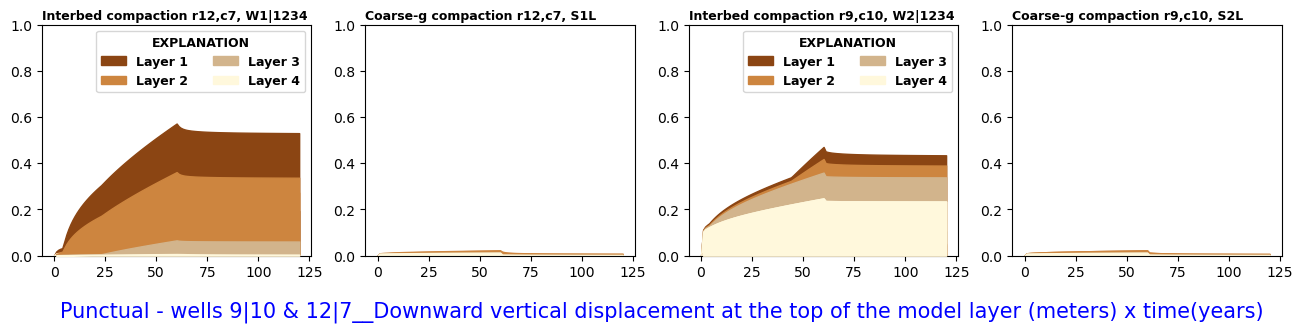

In [36]:
fig = plt.figure(figsize=(16, 3))           ; plot_tags = ("W1L","W2L","S1L","S2L","C1L","C2L",)                           
ax = fig.add_subplot(141) ;      
ax.fill_between (ttime , w1a, 0, color="#8B4513",zorder = 1 )      ; ax.set_ylim(0,1)                 ;pplt(ax,sim,tg="W1L") 
ax.fill_between (ttime , w1b, 0, color="#CD853F",zorder = 2 )      ; ax.set_ylim(0,1) 
ax.fill_between (ttime , w1c, 0, color="#D2B48C",zorder = 3 )      ; ax.set_ylim(0,1) 
ax.fill_between (ttime , w1d, 0, color="#FFF8DC",zorder = 4 )      ; ax.set_ylim(0,1)       
styles.graph_legend(ax,ncol=2) ; styles.heading(ax,heading=f"Interbed compaction {"r12,c7"}, W1|1234") ; pplt(ax,sim,tg="S2L")
ax = fig.add_subplot(142) ; pplt(ax,sim, tg = plot_tags[2])          ; ax.set_ylim(0,1)       
styles.heading(ax,heading=f"Coarse-g compaction {"r12,c7"}, S1L")    ; pplt(ax,sim,tg="S2L")

ax = fig.add_subplot(143) 
ax.fill_between (ttime , w2a, 0, color="#8B4513",zorder = 1 )      ; ax.set_ylim(0,1)                 ;pplt(ax,sim,tg="W2L") 
ax.fill_between (ttime , w2b, 0, color="#CD853F",zorder = 2 )      ; ax.set_ylim(0,1) 
ax.fill_between (ttime , w2c, 0, color="#D2B48C",zorder = 3 )      ; ax.set_ylim(0,1) 
ax.fill_between (ttime , w2d, 0, color="#FFF8DC",zorder = 4 )      ; ax.set_ylim(0,1)       
styles.graph_legend(ax,ncol=2) ; styles.heading(ax,heading=f"Interbed compaction {"r9,c10"}, W2|1234") ; pplt(ax,sim,tg="S2L")
ax = fig.add_subplot(144) ; pplt(ax,sim, tg = plot_tags[3])          ; ax.set_ylim(0,1)       
styles.heading(ax,heading=f"Coarse-g compaction {"r9,c10"}, S2L")    ; pplt(ax,sim,tg="S2L")

ax = fig.add_subplot(111, frame_on=False) ; ax.yaxis.set_visible(False) ; 
ax.set_title('Punctual - wells 9|10 & 12|7__Downward vertical displacement at the top of the model layer (meters) x time(years)' ,color='blue'
             ,x=0.5,y=-0.3,fontsize=15) ; ax.xaxis.set_visible(False); plt.show()

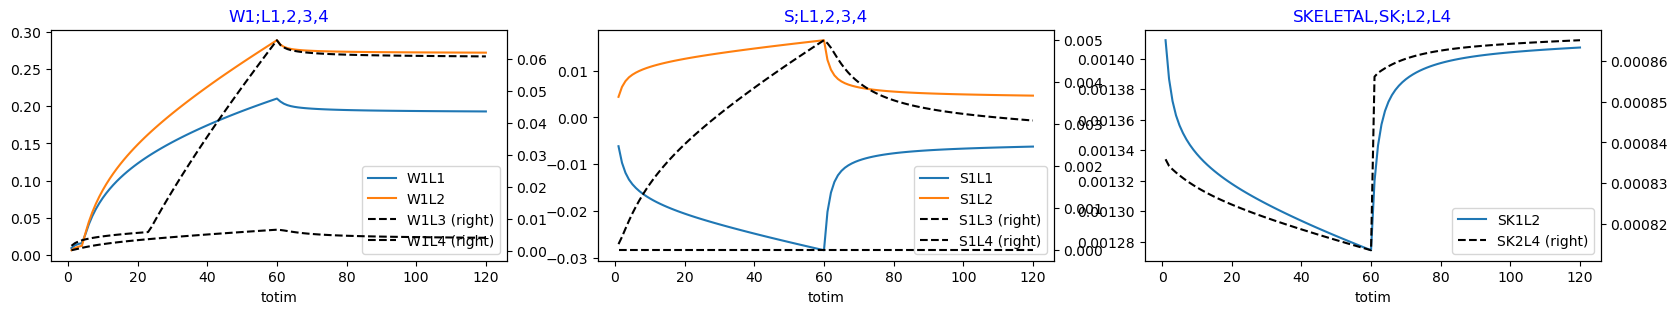

In [37]:
df = csub_obs_P1[['W1L1','W1L2','W1L3','W1L4'    ,'S1L1','S1L2','S1L3','S1L4'     ,'SK1L2','SK2L4']].copy()  ; df.drop(index=0, inplace=True)
fig,ax = plt.subplots(1,3) 
ax[0] = df[['W1L1','W1L2']].plot(figsize=(20,3), ax=ax[0])   ; _=df[['W1L3','W1L4']].plot( ax=ax[0], secondary_y=True, linestyle='dashed', color = 'black') 
ax[1] = df[['S1L1','S1L2']].plot(figsize=(20,3), ax=ax[1])   ; _=df[['S1L3','S1L4']].plot( ax=ax[1], secondary_y=True, linestyle='dashed', color = 'black') 
ax[2] = df[['SK1L2']].plot(figsize=(20,3), ax=ax[2])         ; _=df[['SK2L4']].plot( ax=ax[2], secondary_y=True, linestyle='dashed', color = 'black') 

ax[0].set_title('W1;L1,2,3,4' ,color='blue' )     ; ax[1].set_title('S;L1,2,3,4' ,color='blue' ) ; ax[2].set_title('SKELETAL,SK;L2,L4' ,color='blue' )

plt.show()

<font color='blue'> **"original  .. print again .. if needed "** </font>  

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12,5), sharex=True, constrained_layout=True)                    ;axes = axes.flatten()
idx=0 ;ax=axes[0] ;styles.heading(ax,letter="1a",heading=f"Interbed compaction\n{"r9,c10"}") ;pplt(ax,sim,tg="W1L") ;ax.set_ylim(0,1) ;ax.set_xlim(0, 120) 
idx=1 ;ax=axes[1] ;styles.heading(ax,letter="1b",heading=f"Coarse-g compaction\n{"r9,c10"}") ;pplt(ax,sim,tg="S1L") ;ax.set_ylim(0,1) ;ax.yaxis.set_visible(False) 
idx=1 ;ax=axes[2] ;styles.heading(ax,letter="1c",heading=f"Total    compaction\n{"r9,c10"}") ;pplt(ax,sim,tg="C1L") ;ax.set_ylim(0,1) ;ax.yaxis.set_visible(False) 

idx=3 ;ax=axes[3] ;styles.heading(ax,letter="2a",heading=f"Interbed compaction\n{"r12,c7"}") ;pplt(ax,sim,tg="W2L") ;ax.set_ylim(0,1) ;styles.graph_legend(ax,ncol=2) 
idx=4 ;ax=axes[4] ;styles.heading(ax,letter="2b",heading=f"Coarse-g compaction\n{"r12,c7"}") ;pplt(ax,sim,tg="S2L") ;ax.set_ylim(0,1) ;ax.yaxis.set_visible(False)
idx=5 ;ax=axes[5] ;styles.heading(ax,letter="2c",heading=f"Total    compaction\n{"r12,c7"}") ;pplt(ax,sim,tg="C2L") ;ax.set_ylim(0,1) ;ax.yaxis.set_visible(False) 

ax = fig.add_subplot(111, frame_on=False) ; ax.yaxis.set_visible(False) ; 
ax.set_title('Punctual - wells 9|10 & 12|7__Downward vertical displacement at the top of the model layer (meters) x time(years)' ,color='blue'
             ,x=0.5,y=-0.6,fontsize=15) ; ax.xaxis.set_visible(False); plt.show()